## Boxplots
Elementos:

* Minimo
* Primer Cuartil
* Mediana
* Tercer cuartil
* Maximo

Los "Bigotes" son valores que estan a 1.5 del IQR arriba del tercer cuartil o abajo del primer cuatil

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
np.random.seed(9)
datos = np.random.normal(size = 1000)
datos = np.append(datos, [8, 9, -3, -4])

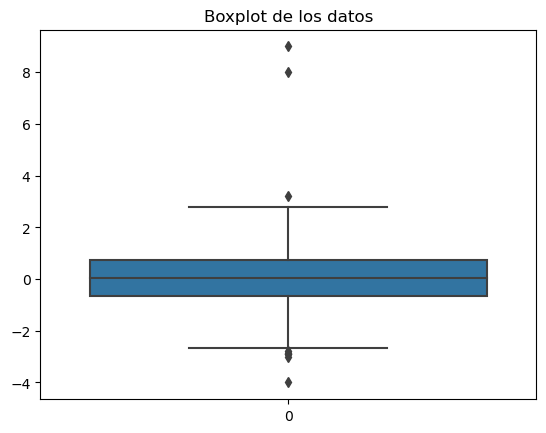

In [14]:
sns.boxplot(datos)

plt.title("Boxplot de los datos")
plt.show()

## Z-Score

El metodo Z-Score, puntuacion estandar o normalizacion, es una tecnica estadistica que se utiliza para describir la oposicion de un valor en relacion con l a media de un grupo de valores, medida en terminos de desviacion estandar del valor respecto a la media.

Z = (X-mu)/sigma; 
Donde X es el valor que estamos evaluando, mu esla media del conjunto, sigma es la desviacion estandar del conjunto.

Esta metrica indica la cantidad de desviacion estandar a la que un valor se encuentra.
Usualmente se consideran atipicos a los valores que se encuentran a 2 o 3 desviaciones estandar.


#### Ventajas:
* Permite comparar puntuaciones de diferentes escalas y distribuciones.
* Es utili para identificar valores atipicos
* Normaliza Los datos utilizando una distribucion normal



#### Desventajas:
* No es robusto frente a valores atipicos extremos, ya que tanto la media como la desviacion estandar son sensibles a valores atipicos
* Presupone que la distribucion de los datos es normal, cual no siempre es cierto en todos los conjuntos de datos reales.

In [1]:
import numpy as np

In [2]:
data = np.random.normal(loc=0, scale=1, size=100)

In [3]:
mean = np.mean(data)
std_dev = np.std(data)


In [5]:
z_scores = [(i - mean) / std_dev for i in data]

In [6]:
print("Z-scores de los datos", z_scores)


Z-scores de los datos [0.6346845142392877, 1.034547300246943, 1.330457782445003, 0.4918102833492109, -0.39530587282029905, -0.16904515006528142, -1.4996037509772322, -1.5327041757015027, -1.3314048361395823, -0.6738564804009526, -1.3430879139327172, 0.14605337997187393, -0.7730346170976131, 0.677095083266077, -1.3312343170175873, 1.2588746113052036, 1.9284039287888446, -0.2552062514415956, 1.1061518079969714, -0.7187262567576165, -0.140277145407438, 0.2025951189039745, 1.456700776018082, -3.279236722825671, -0.03357832736774414, -1.1756059279941937, 1.1277901507729853, 0.03749059576409012, 1.0784232574483068, 0.5744925719694912, -0.13605065069573474, -1.0234853782920905, 0.07683392341548848, 0.2834297656674673, -0.3052841406403537, -0.6396832182652848, -0.5757160193445726, -0.5263322221264248, 0.5654535174717876, -0.5182602087192729, 0.05307384339142748, 0.9498763686069007, 0.9738673874035874, 0.9246258634806809, -0.26415724943012436, -1.0425960822674387, -1.7318000896171306, 0.3434549

In [7]:
outliers = np.where(np.abs(z_scores) > 3)

In [9]:
print("Valores atipicos en el conjunto de datos: ", data[outliers])

Valores atipicos en el conjunto de datos:  [-3.49355257]


## DBSCAN

    Densitiy-Based Spatial Clustering of Applications with Noise (Agrupamiento espacial basado en densidad de aplicaciones con ruido)

Es un algotimo de clustering que se utiliza en ML y analasis de datos, para identificar grupos de puntos en el espacion que estan cercanamanete untos, basandose en la densidad

Es un algoritmo particularmente bueno para identificar clusters de forma arbitraria y para manejar puntos de ruido o outliers

#### Principios basicos del DBSCAN

* **Densidad de puntos:** DBSCAN clasifica las regiones en clusters basdandose en la densidad de puntos, que se definen por el numero de puntos dentro de un radio especifico

* **Puntos clave:** Son los puntos que tienen al menos un numero minimo de otro puntos (MinPts), dentro de su radio, lo cual los califica como puntos centrales de un cluster


* **Puntos frontera:** Son puntos que no son puntos clave, pero caen en el radio de un punto clave

* **Puntos Ruido:** Son puntos que no son ni, calve ni frontera, no tienen suficientes vecinos para formar un cluster y estan alejados de los clusters existentes

#### Funcionamiento del algoritmo

* **Selecciionar Parametros:** Sleccionas dos parametros, epsilon y MinPts, epsilon define el radio de cecindad alrededor de un punto y MinPts, es el numero minimo de puntos que deben encontrarse dentro de ese radio, para que sea punto central

* **Encontrar puntos clave:** Para cada punto, en el algoritmo, cuenta cuantos puntos caen dentro de su radio epsilon. Si un punto tiene MinPts o mas dentro de ese radio se marca como punto clave

* **Expandir Clusters:** A partir de los puntos clave, el algoritmo intenta expandir el cluster. Para cada nuevo punto que se anade al cluster, el algoritmo tambien verifica si ese punto es asu vez un punto clave

* **Clasificar puntos Frontera y Ruido:** Los puntos que no son clave pero estan cerca de un punto clave se consideran puntos frontera y se agregan al cluster mas cercano, los otros son ruido



#### Ventajas

* **No necesita el numero de clusters como entrada:** A diferencia del k-means, no
* **Manjea bien los outliers:** Los puntos que no pertenecen se tratan como ruido
* **Puede encontrar clusters de forma irregulaes:** No se limita a econtrar solo clusters de forma esderica como k-means

#### Desventajas

* **Seleccion de parametros:** Elegir epsilon y MinPts puede ser dificil y requere conocimiento del dominio o experimentacion
* **Sensibilidad a los parametros:** El rendimiento y lso resultados del algoritmo pueden varias significativamente con difentes valoes de epsilon y MinPts
* **Dificultad con sendidades variables:** si los clusters tienen 

DBSCAN es ampliamanete utilizado en la deteccion de anomalias, la segmentacin de imanes donde la estrucutra de datos es demasiado compleja para un K-means

In [16]:
import numpy as no
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

In [45]:

X, y = make_moons(n_samples = 300, noise = 0.05, random_state = 42)

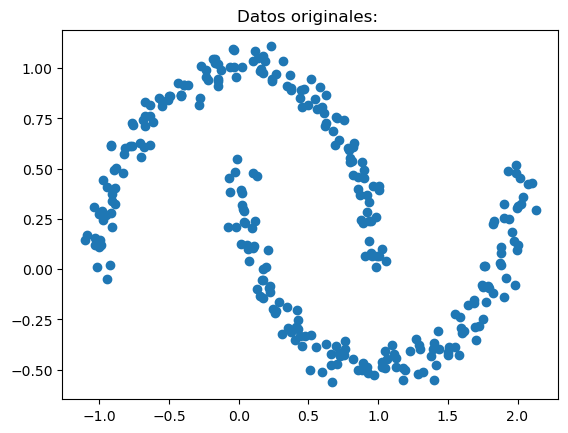

In [46]:
plt.scatter(X[:, 0], X[:, 1])
plt.title("Datos originales: ")
plt.show()

In [47]:

epsilon = 0.2
min_samples = 5
dbscan = DBSCAN(eps = epsilon, min_samples= min_samples)

In [48]:
clusters = dbscan.fit_predict(X)

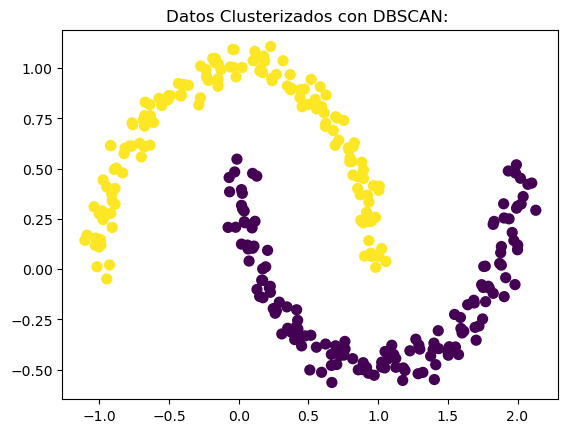

In [49]:
plt.scatter(X[:, 0], X[:, 1], c = clusters, cmap = 'viridis', marker = 'o', s = 50, label = 'Datos clusterizados')
plt.title("Datos Clusterizados con DBSCAN: ")
plt.show()

In [50]:
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)

print("Atipicos: ", n_noise)
print("Number of clusters: ", n_clusters)

Atipicos:  0
Number of clusters:  2


## Isolation Forest:

## Local Outlier Factor

## One-Class SVM (Support Vector Machine)

## Ellipric Evelope (Envoltorio Eliptico)


## Autoencoders